# Visualization with Matplotlib

In [1]:
import numpy as np # numerical python
import pandas as pd # data processing
import matplotlib as plt2
import matplotlib.pyplot as plt

print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",plt2.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Matplotlib version: 3.3.2


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train["Sex"].value_counts().tolist()

[577, 314]

In [5]:
df = train.groupby("Sex")["Survived"].count()

In [6]:
print("male ratio:",train["Sex"].value_counts().tolist()[0]*100/(train["Sex"].count()))
print("female ratio:",train["Sex"].value_counts().tolist()[1]*100/(train["Sex"].count()))
df2 = [train["Sex"].value_counts().tolist()[0]*100/(train["Sex"].count()), 
       train["Sex"].value_counts().tolist()[1]*100/(train["Sex"].count())]

male ratio: 64.75869809203142
female ratio: 35.24130190796858


# Number of the passengers visualization

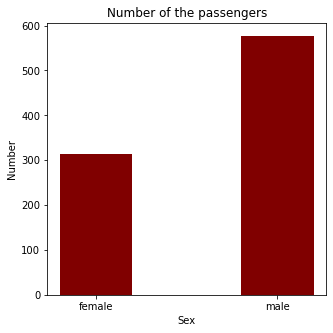

In [7]:
x = ["female","male"]
y = [35.2, 64.7]
fig = plt.figure(figsize = (5, 5))

plt.bar(x, df, color ='maroon',
        width = 0.4)
 
plt.xlabel("Sex")
plt.ylabel("Number")
plt.title("Number of the passengers")
plt.show()

In [8]:
import statistics
print(statistics.variance(df2))
print(df2)

435.6383387434639
[64.75869809203142, 35.24130190796858]


# Percentage of the passengers visualization

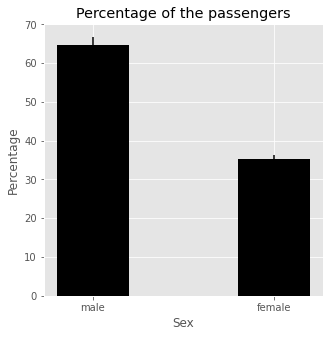

In [9]:
x = ["male","female"]
plt.style.use("ggplot")#Style
variance = [2,1]
fig = plt.figure(figsize = (5, 5))

plt.bar(x, df2, color ="black",
        width = 0.4, yerr=variance)#yerr eror bar

plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.title("Percentage of the passengers")
plt.show()

# Horizontal bar

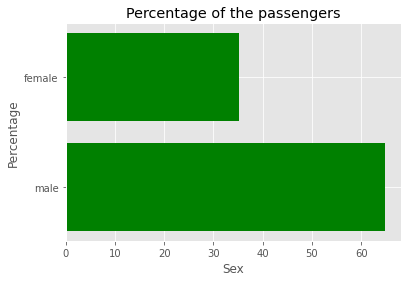

In [10]:
x = ["male","female"]

plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.title("Percentage of the passengers")
plt.barh(x, df2,color="green")
plt.show()

In [11]:
df = train.copy()
df.drop(["PassengerId","Pclass","Name","Parch","Ticket","Cabin","Embarked"],axis=1,inplace=True)
df

,Survived,Sex,Age,SibSp,Fare
0,0,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,1,female,26.0,0,7.9250
3,1,female,35.0,1,53.1000
4,0,male,35.0,0,8.0500
...,...,...,...,...,...
886,0,male,27.0,0,13.0000
887,1,female,19.0,0,30.0000
888,0,female,NaN,1,23.4500
889,1,male,26.0,0,30.0000


In [12]:
print(pd.isnull(train).sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
print(pd.isnull(train["Age"]).sum())


0


In [14]:
pd.set_option("display.max_rows", None)
print(train["Cabin"].value_counts())

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
E101               3
D                  3
C22 C26            3
F2                 3
D17                2
C78                2
B5                 2
C65                2
C93                2
E24                2
F4                 2
C92                2
E33                2
F G73              2
B22                2
E8                 2
B35                2
B51 B53 B55        2
D26                2
B28                2
E121               2
C123               2
E25                2
C83                2
B57 B59 B63 B66    2
C125               2
B49                2
B18                2
D20                2
E44                2
C126               2
D33                2
C68                2
E67                2
C52                2
B20                2
B58 B60            2
C2                 2
C124               2
D35                2
D36                2
B77                2
C118               1
B69          

In [33]:
cabin_list = train["Cabin"].unique()
cabin_list = np.delete(cabin_list, 0)
cabin_list = cabin_list.tolist()
cabin_list

['C85',
 'C123',
 'E46',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G63',
 'C62 C6

In [17]:
train["Cabin"] = train["Cabin"].fillna("G6")
train["Cabin"]

0                   G6
1                  C85
2                   G6
3                 C123
4                   G6
5                   G6
6                  E46
7                   G6
8                   G6
9                   G6
10                  G6
11                C103
12                  G6
13                  G6
14                  G6
15                  G6
16                  G6
17                  G6
18                  G6
19                  G6
20                  G6
21                 D56
22                  G6
23                  A6
24                  G6
25                  G6
26                  G6
27         C23 C25 C27
28                  G6
29                  G6
30                  G6
31                 B78
32                  G6
33                  G6
34                  G6
35                  G6
36                  G6
37                  G6
38                  G6
39                  G6
40                  G6
41                  G6
42                  G6
43         

In [18]:
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [19]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [21]:
train["Age"].value_counts()
data2 =[
    29.699118,24.000000,22.000000,18.000000,28.000000,30.000000,19.000000,21.000000,25.000000, 36.000000,29.000000,
    35.000000,26.000000,32.000000,27.000000 ,31.000000,16.000000,23.000000,34.000000,33.000000,20.000000,39.000000,
    40.000000,42.000000,17.000000,45.000000,38.000000,4.000000,50.000000,2.000000,48.000000,44.000000,47.000000,54.000000,9.000000, 1.000000,     51.000000,    14.000000      
,49.000000    ,3.000000       ,37.000000      ,52.000000      ,41.000000      ,43.000000      ,58.000000      ,15.000000      
,56.000000  ,60.000000,62.000000,11.000000,5.000000,8.000000,6.000000,65.000000,7.000000,61.000000,46.000000      
,64.000000,13.000000      ,0.830000,30.500000      ,0.750000,57.000000,55.000000      ,70.000000,10.000000      
,32.500000      ,71.000000      ,63.000000,28.500000      ,45.500000      ,40.500000,59.000000,14.500000,0.670000       
,12.000000 ,0.920000       ,74.000000,34.500000      ,70.500000      ,36.500000,24.500000,66.000000      ,80.000000      
,55.500000      ,53.000000,20.500000      ,23.500000,0.420000       
]

In [22]:
data = [
    177,     30,     27,     26,     25,     25,     25,     24,     23,22,     20,     18
,     18,     18,18, 17,17,15 ,15,15, 15, 14, 13, 13,13,12 ,11,10,10,10 ,9,9,9,8,8,7,7,6,6     
    ,6,6,6,6,5,5,5 ,4,4,4,4,4,4,3,3,3,3,3,2,2,2,
    2,2,2,2,2,2,2, 2,2 ,2,2,2,2,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1,     1
]

# Ages barplot

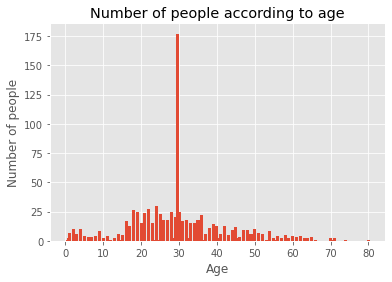

In [24]:
plt.bar(data2,data)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Number of people according to age")
plt.show()

# Number of survived people

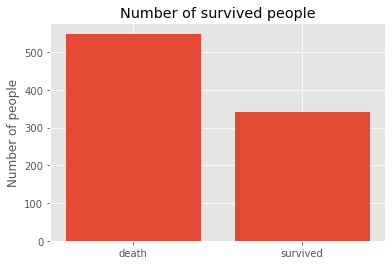

In [32]:
survived2 = ["death","survived"]
survived = train["Survived"].value_counts()
plt.bar(survived2,survived)
plt.ylabel("Number of people")
plt.title("Number of survived people")
plt.show()

# Day 16
Visualization